This database contains 34 attributes. 35th is the class label, i.e. the disease name. The names and id numbers of the patients were removed from the database.

The differential diagnosis of erythemato-squamous diseases is a real problem in dermatology. They all share the clinical features of erythema and scaling, with very little differences. The diseases in this group are psoriasis, seboreic dermatitis, lichen planus, pityriasis rosea, cronic dermatitis, and pityriasis rubra pilaris. Usually a biopsy is necessary for the diagnosis but unfortunately these diseases share many histopathological features as well. Another difficulty for the differential diagnosis is that a disease may show the features of another disease at the beginning stage and may have the characteristic features at the following stages. Patients were first evaluated clinically with 12 features. Afterwards, skin samples were taken for the evaluation of 22 histopathological features. The values of the histopathological features are determined by an analysis of the samples under a microscope.

In the dataset constructed for this domain, the family history feature has the value 1 if any of these diseases has been observed in the family, and 0 otherwise. The age feature simply represents the age of the patient. Every other feature (clinical and histopathological) was given a degree in the range of 0 to 3. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values.

In [ ]:
Clinical Attributes: (take values 0, 1, 2, 3, unless otherwise indicated)
1 Erythema
2 Scaling
3 definite borders
4 Itching
5 koebner phenomenon
6 polygonal papules
7 follicular papules
8 oral mucosal involvement
9 knee and elbow involvement
10 scalp involvement
11 family history (0 or 1)
34 Age

Histopathological Attributes: (take values 0, 1, 2, 3)
12 melanin incontinence
13 eosinophils in the infiltrate
14 PNL infiltrate
15 fibrosis of the papillary dermis
16 Exocytosis
17 Acanthosis
18 Hyperkeratosis
19 Parakeratosis
20 clubbing of the rete ridges
21 elongation of the rete ridges
22 thinning of the suprapapillary epidermis
23 spongiform pustule
24 munro microabcess
25 focal hypergranulosis
26 disappearance of the granular layer
27 vacuolisation and damage of basal layer
28 Spongiosis
29 saw-tooth appearance of retes
30 follicular horn plug
31 perifollicular parakeratosis
32 inflammatory monoluclear inflitrate
33 band-like infiltrate

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Read the contents of the file into a DataFrame
df = pd.read_csv("dermatology.csv", sep='\t')
import pandas as pd
df.head()

,Erythema,Scathing,Definite Borders,Itching,Koebner,Polygonal,Follicular,Oral,Knee,Scalp,...,Disapperance,Vacuolisation,Spongiosis,Retes,Follicular.1,Perifollicular,Inflamatory,Band-like,Age,Disease
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [1]:
# df.info()

In [16]:
# Age is currently not an integer. 
# Verifying all age values can be converted to integer and if not, printing them to see their values
# Convert 'Age' column to numeric (this will convert NaN where necessary)

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    # Check if Age column value can be converted to an integer
    if not str(row['Age']).isdigit():
        # If conversion fails, append the row to the list
        non_numeric_rows.append(row)

# Convert the list of rows to a DataFrame
non_numeric_df = pd.DataFrame(non_numeric_rows)

# Print the DataFrame containing rows where conversion fails
print("Rows where 'Age' column values cannot be converted to int:")
non_numeric_df

Rows where 'Age' column values cannot be converted to int:


,Erythema,Scathing,Definite Borders,Itching,Koebner,Polygonal,Follicular,Oral,Knee,Scalp,...,Disapperance,Vacuolisation,Spongiosis,Retes,Follicular.1,Perifollicular,Inflamatory,Band-like,Age,Disease
0,2.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,55.0,2.0
1,3.0,3.0,3.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,1.0
2,2.0,1.0,2.0,3.0,1.0,3.0,0.0,3.0,0.0,0.0,...,0.0,2.0,3.0,2.0,0.0,0.0,2.0,3.0,26.0,3.0
3,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,...,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,40.0,1.0
4,2.0,3.0,2.0,2.0,2.0,2.0,0.0,2.0,0.0,0.0,...,2.0,3.0,2.0,3.0,0.0,0.0,2.0,3.0,45.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,2.0,1.0,2.0,3.0,2.0,3.0,0.0,2.0,0.0,0.0,...,0.0,2.0,0.0,2.0,0.0,0.0,0.0,3.0,?,3.0
262,2.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,?,5.0
263,1.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,?,5.0
264,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,?,5.0


In [9]:
# The rows that cannot be converted to int contain a '?' therefore it's okay to coerce the errors

# assign the age column to array
age_original = df['Age']

# Convert the 'Age' column to numeric, replacing non-numeric values with NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Print the rows where NaN is assigned
print("Non-numeric values replaced with NaN:")
non_numeric_rows = df[df['Age'].isna()]
non_numeric_rows

Non-numeric values replaced with NaN:


,Erythema,Scathing,Definite Borders,Itching,Koebner,Polygonal,Follicular,Oral,Knee,Scalp,...,Disapperance,Vacuolisation,Spongiosis,Retes,Follicular.1,Perifollicular,Inflamatory,Band-like,Age,Disease
33,2,2,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,NaN,1
34,2,1,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,4
35,2,2,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,2
36,2,1,2,3,2,3,0,2,0,0,...,0,2,0,2,0,0,0,3,NaN,3
262,2,1,0,2,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,NaN,5
263,1,1,1,3,0,0,0,0,0,0,...,0,0,3,0,0,0,2,0,NaN,5
264,1,1,0,2,0,0,0,0,1,0,...,0,0,2,0,0,0,3,0,NaN,5
265,1,1,0,3,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,NaN,5


In [183]:
# Interpolate NaN values in the 'Age' column using ffill
df['Age'] = df['Age'].interpolate(method='ffill')

# Convert the 'Age' column back to integer type
df['Age'] = df['Age'].astype(int)

# Confirm no rows have NaN
non_numeric_rows = df[df['Age'].isna()]
print(non_numeric_rows)

Empty DataFrame
Columns: [Erythema, Scathing, Definite Borders, Itching, Koebner , Polygonal, Follicular, Oral, Knee, Scalp, Family Hostory, Melanin, Eosinophils, PNL, Fibrosis, Exocytosis, Acanothosis, Hyperkeratosis, Parakeratosis, Clubbing, Elongation, Thinning, Spongiform, Munro, Focal, Disapperance, Vacuolisation, Spongiosis, Retes, Follicular.1, Perifollicular, Inflamatory, Band-like, Age, Disease]
Index: []

[0 rows x 35 columns]


In [184]:
df['Age'].describe()

count    366.000000
mean      36.267760
std       15.157598
min        0.000000
25%       25.000000
50%       35.000000
75%       48.000000
max       75.000000
Name: Age, dtype: float64

### Let’s try determining the type of disease based on the patient’s Age. 

### Using gradient descent (GD) to build your regression model (model1)

In [185]:
# Preprocess the data
# assign the features
X = df.drop(columns=['Disease']).values  # Features excluding Disease
X = np.hstack((np.ones((X.shape[0], 1)), X))  # Add bias term (column of ones)
y = df['Disease'].values  # Target variable (Disease)

# Initialize the model parameters as an array
theta = np.random.randn(X.shape[1])  # Weights and bias
learning_rate = 0.001
iterations = 1000

# Gradient Descent function
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    cost_history = np.zeros(num_iters)

    for i in range(num_iters):
        predictions = X.dot(theta)
        errors = predictions - y
        
        # Calculate gradients
        gradients = (1/m) * X.T.dot(errors)
        
        # Update parameters
        theta -= alpha * gradients
        
        # Calculate cost
        cost_history[i] = (1/(2*m)) * np.sum(errors**2)
    
    return theta, cost_history

# Train the model
theta, cost_history = gradient_descent(X, y, theta, learning_rate, iterations)

# Print the final model parameters
print("Final model parameters:")
print(f"Weights (theta_1, ..., theta_n): {theta[1:]}")
print(f"Bias (theta_0): {theta[0]}")

Final model parameters:
Weights (theta_1, ..., theta_n): [-0.06423028 -0.01587731 -1.37605295 -0.25418698  0.01529349 -0.08653786
  0.70314141 -0.39549782 -0.17620463 -0.64588155 -0.63160537  1.16132208
 -0.69646476  0.64075755 -0.08491572  1.44554148  1.17866348  0.4442037
  0.06970279 -0.09981529  1.65708208 -1.02647277 -0.14406658  1.63674657
 -0.99050895  0.31349613 -0.1945818   0.33210748  0.68654515  1.38852577
 -0.43642981 -0.67695588  0.60116641  0.00595488]
Bias (theta_0): -0.5467363081117218


Model 1: Gradient Descent for Regression
Features Used: Age
Parameters Learned: Coefficients for the linear regression model
Hyperparameters: Learning rate, number of epochs
The model learned a linear relationship between the age of patients and the disease type using gradient descent.

Weights (theta_n): the coefficients associated with each feature in the dataset used in predicting the target variable (Disease). For example, a positive weight indicates that an increase in the corresponding feature value leads to an increase in the predicted disease type, while a negative weight indicates the opposite.

Bias (theta_0): This is the intercept term in the linear regression model. It represents the baseline value of the target variable when all feature values are zero. In this case, the bias term is approximately -0.93. This means that when all feature values are zero, the predicted disease type is expected to be around -0.93. However, interpreting the bias term alone might not be meaningful without considering the weights of the features.

### Use random forest on the clinical as well as histopathological attributes to classify the disease type (model2). 

In [186]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop(["Disease"], axis=1).values
y = df["Disease"].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the random forest classification model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred = rf.predict(X_test)
accuracy = rf.score(X_test, y_test)
print(f"Random Forest Accuracy: {accuracy}")

Random Forest Accuracy: 0.9864864864864865


The Random Forest Accuracy of 0.9864864864864865 means that the model is able to correctly classify the disease type in approximately 98.65% of the cases. This indicates that the features used in the model (clinical and histopathological attributes) are highly relevant to the disease type. This suggests that the model is able to effectively capture the underlying patterns and relationships in the data.

Model 2: Random Forest Classifier
Features Used: All clinical and histopathological attributes
Parameters Learned: Decision trees ensemble, including tree depth, number of trees, and features used at each split
Hyperparameters: Number of trees, maximum depth of trees, minimum samples per leaf, etc.
This model utilized a powerful ensemble technique to classify disease types based on a wide range of features.

### Use kNN on the clinical attributes and histopathological attributes to classify the disease type and report your accuracy (model3). 

In [187]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('Disease', axis=1)
y = df['Disease']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Evaluate the model
accuracy = knn_model.score(X_test, y_test)
print(f"kNN Accuracy: {accuracy}")

kNN Accuracy: 0.8243243243243243


An accuracy of 0.8243 indicates that the kNN model correctly classified approximately 82.43% of the data points in your test set which can learn patterns from the training data and generalize them to unseen data points in the test set.

Model 3: k-Nearest Neighbors (kNN) Classifier
Features Used: All clinical and histopathological attributes
Parameters Learned: None (as kNN is a lazy learner)
Hyperparameters: Number of neighbors (k), distance metric
kNN classified disease types based on the similarity of patients' feature vectors in the attribute space.

### Finally, use two different clustering algorithms and see how well these attributes can determine the disease type (model4 and model5). 

K-Means Clustering ARI: 0.025
Agglomerative Clustering ARI: 0.029


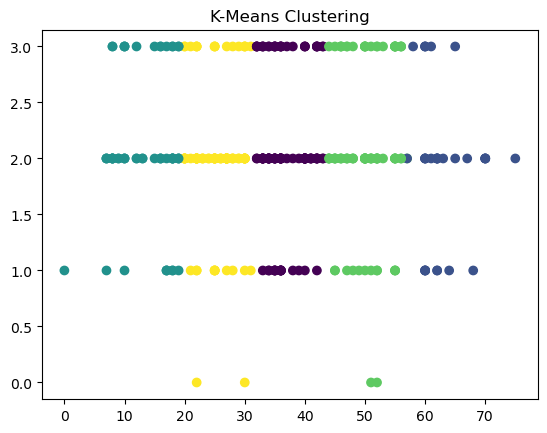

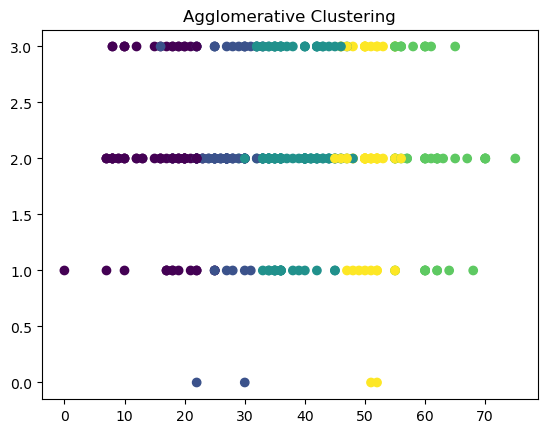

In [188]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt

# Define the input features
features = df.drop(columns=['Disease']).values

# Define the clustering algorithms
kmeans = KMeans(n_clusters=5, random_state=42)
agglomerative = AgglomerativeClustering(n_clusters=5)

# Train the clustering models

# K-Means Clustering (model4)
kmeans.fit(features)
df['kmeans_cluster'] = kmeans.labels_

# Agglomerative Clustering (model5)
agglomerative.fit(features)
df['agglomerative_cluster'] = agglomerative.labels_

# Evaluate the clustering models
y_pred_kmeans = kmeans.labels_
y_pred_agglomerative = agglomerative.labels_

# Calculate ARI for K-Means Clustering (model4)
kmeans_ari = adjusted_rand_score(df['Disease'], y_pred_kmeans)
print(f"K-Means Clustering ARI: {kmeans_ari:.3f}")

# Calculate ARI for Agglomerative Clustering (model5)
agglomerative_ari = adjusted_rand_score(df['Disease'], y_pred_agglomerative)
print(f"Agglomerative Clustering ARI: {agglomerative_ari:.3f}")

# Visualize K-Means clusters
plt.scatter(df['Age'], df['Erythema'], c=df['kmeans_cluster'])
plt.title('K-Means Clustering')
plt.show()

# Visualize Agglomerative clusters
plt.scatter(df['Age'], df['Erythema'], c=df['agglomerative_cluster'])
plt.title('Agglomerative Clustering')
plt.show()

Model 4: K-means Clustering
Features Used: All clinical and histopathological attributes
Parameters Learned: Cluster centroids
Hyperparameters: Number of clusters
K-means grouped patients into clusters based on similarity in feature space without any prior knowledge of disease types.
Model 5: Aglomerative Clustering
Features Used: All clinical and histopathological attributes
Parameters Learned: Cluster labels
Hyperparameters: Epsilon (maximum distance between points) and minimum samples per cluster
Aglomerative clusters identified clusters based on density, allowing for irregularly shaped clusters.

Both scores are very close to 0, which suggests that neither K-Means nor Agglomerative Clustering effectively captured the inherent structure in the data to group patients based on disease types.

In [212]:
from sklearn.metrics import silhouette_score

# Compute silhouette score for K-means clustering
silhouette_avg_kmeans = silhouette_score(features, y_pred_kmeans)
print("Silhouette Score for K-means:", silhouette_avg_kmeans)

# Compute silhouette score for DBSCAN clustering
silhouette_avg_aglom = silhouette_score(features, y_pred_agglomerative)
print("Silhouette Score for aglomerative:", silhouette_avg_aglom)

Silhouette Score for K-means: 0.3130077755991798
Silhouette Score for aglomerative: 0.25301852874176206


The silhouette score ranges from -1 to 1, where a higher score indicates better-defined clusters.A higher silhouette score indicates better clustering performance, with data points more tightly clustered within their own groups and well-separated from other clusters.

The silhouette score for K-means clustering is 0.313, which is relatively positive.
This indicates that data points within clusters are closer to each other than to data points in neighboring clusters. A score around 0.3 suggests moderate separation between clusters, indicating reasonable clustering performance.

The silhouette score for Agglomerative clustering is 0.253, which is lower than that of K-means.
This suggests that the clustering may have less distinct separation between clusters. It still indicates that the clustering has some level of separation between clusters although not as well-defined as with K-means.

### Compare and contrast the five models you built. Having done both classification and clustering on the same dataset, what can you say about this data and/or the techniques you used? Write your thoughts in 2-3 paragraphs. 

The regression model (Model 1) provides a continuous prediction of disease type based on age, while the classification models (Models 2 and 3) categorize patients into specific disease types.
Models 2 and 3 (Random Forest and kNN) performed classification, achieving accuracy metrics. However, they differ in their approaches, with Random Forest leveraging ensemble learning and kNN relying on similarity-based classification.
Clustering models (Models 4 and 5) aimed to group patients based on similarity in features, without any prior knowledge of disease types. K-means clustering provides clusters with roughly equal variance, while DBSCAN can handle clusters of varying shapes and sizes.
The choice between regression, classification, and clustering depends on the nature of the problem and the available data. In this case, combining multiple techniques provides a comprehensive understanding of the dataset, revealing both continuous relationships (like age and disease type) and categorical groupings (like disease types).
Overall, the combination of techniques reveals insights into patient data, allowing for both predictive modeling and exploratory analysis.